In [1]:

import warnings
from math import sqrt

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import r2_score
%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv("data/data_deals_done.csv")
    print(df.columns)
    print(df.shape)
except Exception:
    print("Seems we have a problem")


Index(['_id', 'sale_day', 'address', 'property_type', 'rooms_number', 'floor',
       'build_year', 'building_mr', 'city', 'street', 'street_number',
       'neighborhood', 'address_area', 'address_neighborhood', 'sale_day_year',
       'sale_day_month', 'final_price'],
      dtype='object')
(304431, 17)


In [3]:
top_city = 20
df.groupby(['city']).city.value_counts().nlargest(top_city)


city         city       
תל אביב יפו  תל אביב יפו    23201
ירושלים      ירושלים        21330
חיפה         חיפה           21320
באר שבע      באר שבע        18557
פתח תקווה    פתח תקווה      14260
אשדוד        אשדוד          13580
נתניה        נתניה          12932
אשקלון       אשקלון         12646
ראשון לציון  ראשון לציון    11998
חולון        חולון           9876
רמת גן       רמת גן          9055
בת ים        בת ים           8441
רחובות       רחובות          7511
חדרה         חדרה            6446
נהריה        נהריה           5346
אילת         אילת            5185
קרית אתא     קרית אתא        4528
עפולה        עפולה           4208
בני ברק      בני ברק         3405
לוד          לוד             3223
Name: city, dtype: int64

In [4]:
# choose city
cities = df.groupby(['city']).city.value_counts().nlargest(top_city)


תל אביב יפו
ירושלים
חיפה
באר שבע
פתח תקווה
אשדוד
נתניה
אשקלון
ראשון לציון
חולון
רמת גן
בת ים
רחובות
חדרה
נהריה
אילת
קרית אתא
עפולה
בני ברק
לוד


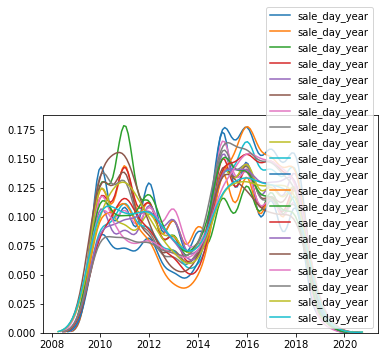

תל אביב יפו
ירושלים
חיפה
באר שבע
פתח תקווה
אשדוד
נתניה
אשקלון
ראשון לציון
חולון
רמת גן
בת ים
רחובות
חדרה
נהריה
אילת
קרית אתא
עפולה
בני ברק
לוד


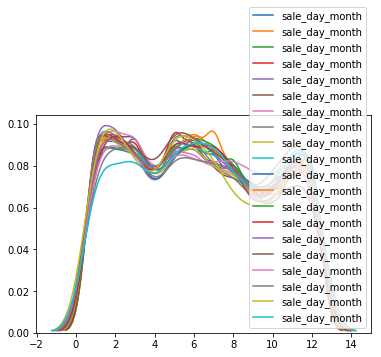

In [5]:
for city in cities.keys():
    print(city[0])
    _df = df.loc[(df['city'] == city[0])]
    
    sns.kdeplot(_df['sale_day_year'])
plt.show()

for city in cities.keys():
    print(city[0])
    _df = df.loc[(df['city'] == city[0])]
    
    sns.kdeplot(_df['sale_day_month'])
plt.show()

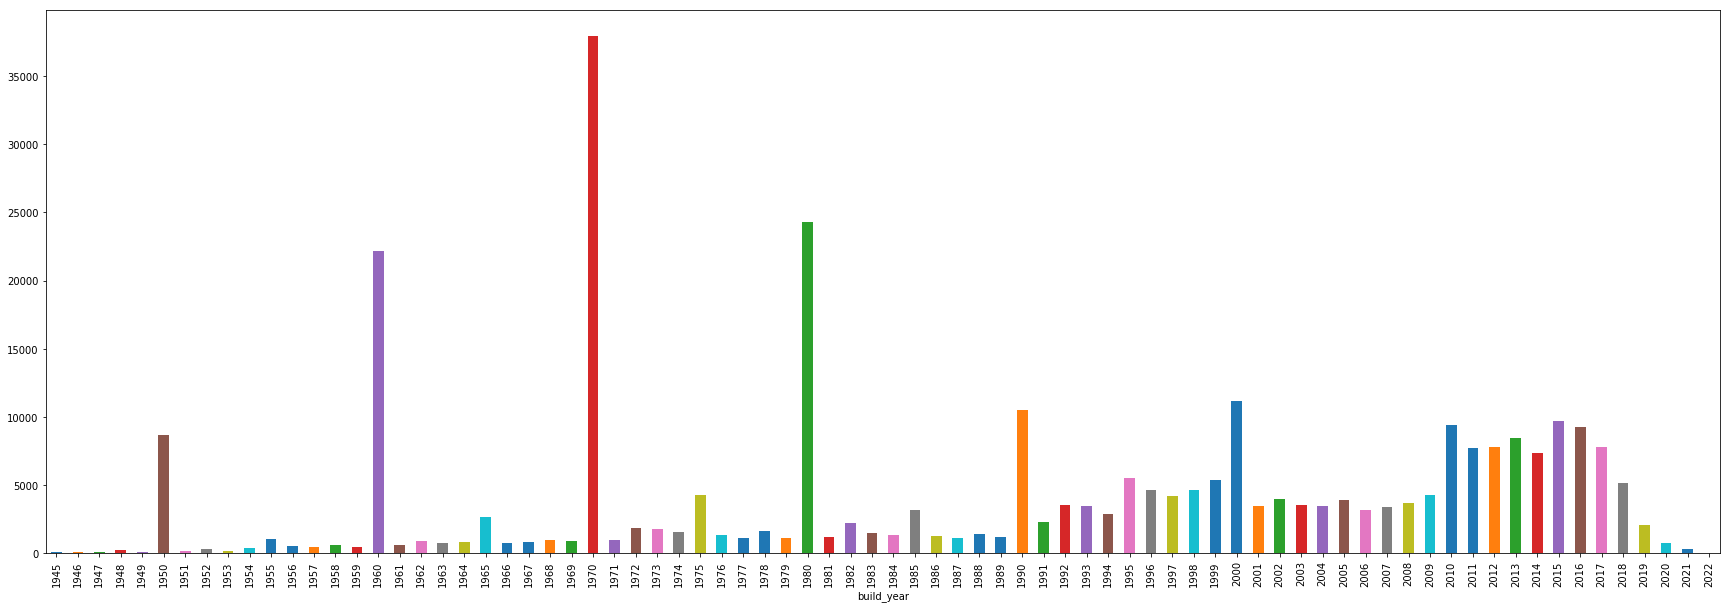

In [6]:

df['build_year'] = pd.to_datetime(df['build_year'], format="%Y-%d-%m")
_df = df.groupby([df["build_year"].dt.year])
_df['build_year'].count().plot(kind="bar", figsize=(30, 10))